# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
data = pd.read_csv('liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             128355 non-null  int64  
 1   Month            128355 non-null  int64  
 2   Supplier         128331 non-null  object 
 3   ItemCode         128355 non-null  object 
 4   Description      128355 non-null  object 
 5   ItemType         128354 non-null  object 
 6   RetailSales      128355 non-null  float64
 7   RetailTransfers  128355 non-null  float64
 8   WarehouseSales   128355 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [33]:
grouped = data.groupby('ItemType').sum()
grouped

,Year,Month,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,,,
BEER,33132676,115830,209763.11,234924.44,2437617.32
DUNNAGE,64552,236,0.00,0.00,-45331.00
KEGS,7338694,27033,0.00,0.00,43558.00
LIQUOR,57282701,197353,309847.85,334176.41,33173.32
NON-ALCOHOL,1266826,4426,8109.97,9058.37,8656.72
REF,102879,385,281.34,171.92,-6754.00
STR_SUPPLIES,213823,774,995.98,3594.70,0.00
WINE,159514312,562617,313400.42,340710.51,433009.47


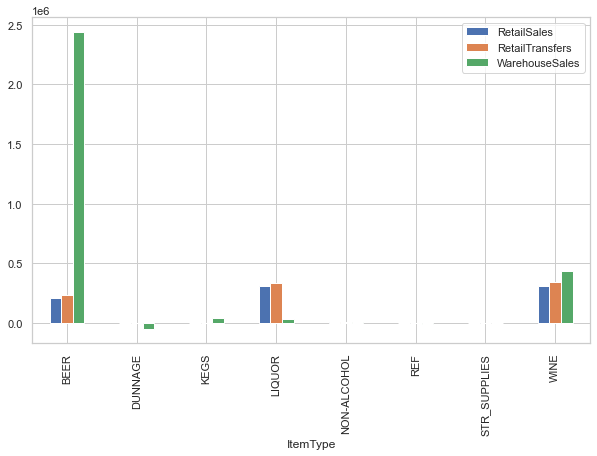

In [38]:
totalsales= data.groupby('ItemType')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].sum()
totalsales.plot(kind='bar', figsize=(10,6))

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             128355 non-null  int64  
 1   Month            128355 non-null  int64  
 2   Supplier         128331 non-null  object 
 3   ItemCode         128355 non-null  object 
 4   Description      128355 non-null  object 
 5   ItemType         128354 non-null  object 
 6   RetailSales      128355 non-null  float64
 7   RetailTransfers  128355 non-null  float64
 8   WarehouseSales   128355 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

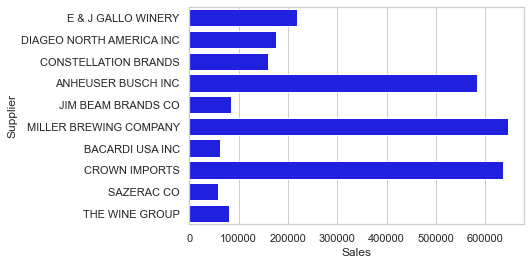

In [39]:
#group by supplier and sum all the sales columns
grouped = data.groupby('Supplier').sum().sort_values(by='RetailSales', ascending=False).head(10)
sales_mix = grouped['RetailSales'] + grouped['RetailTransfers'] + grouped['WarehouseSales']

#create a bar chart with three bars for total retail sales, retail transfers, and warehouse sales
sns.barplot(x=sales_mix, y=grouped.index, color='blue')

plt.xlabel('Sales')
plt.ylabel('Supplier')

plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [43]:
avg_sales= data.groupby('Month')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].mean()
avg_sales

,RetailSales,RetailTransfers,WarehouseSales
Month,,,
1,5.679413,5.574833,19.072137
2,5.939247,6.050136,20.229658
4,0.000000,15.707503,0.000000
5,7.038838,7.421817,27.310548
6,7.143914,6.950396,27.839069
8,6.409991,6.584726,28.122641
9,6.757254,6.419721,22.817909
10,6.549021,6.827827,22.289367
11,6.765496,7.103699,23.348862


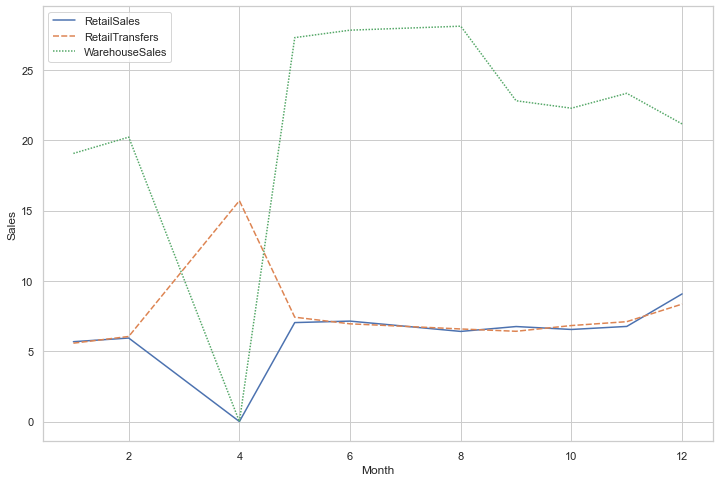

In [50]:
#create a multi-line chart
sns.lineplot(data=avg_sales, figure=plt.figure(figsize=(12, 8)))

plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(loc='upper left')

plt.show()

## 4. Plot the same information as above but as a bar chart.

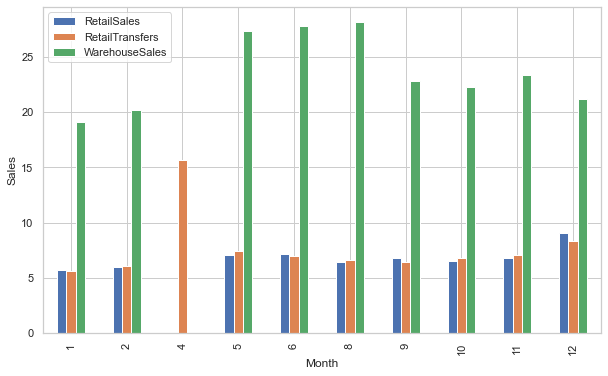

In [54]:
#create a bar chart
avg_sales.plot.bar(figsize=(10,6))

plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(loc='upper left')

plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

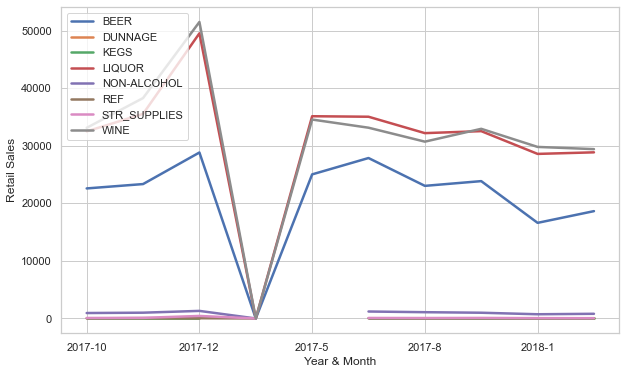

In [64]:
#Creating a new column Year_month: 

data['Year_Month'] = data.apply(lambda row: str(row['Year']) + '-' + str(row['Month']), axis=1)

sales_by_type = data.groupby(['Year_Month', 'ItemType'])['RetailSales'].sum().reset_index()

sales_by_type = sales_by_type.pivot(index='Year_Month', columns='ItemType', values='RetailSales')

sales_by_type.plot(figsize=(10,6), linewidth=2.5)

plt.xlabel('Year & Month')
plt.ylabel('Retail Sales')
plt.legend(loc='upper left')

plt.show()

## 6. Plot the same information as above but as a bar chart.

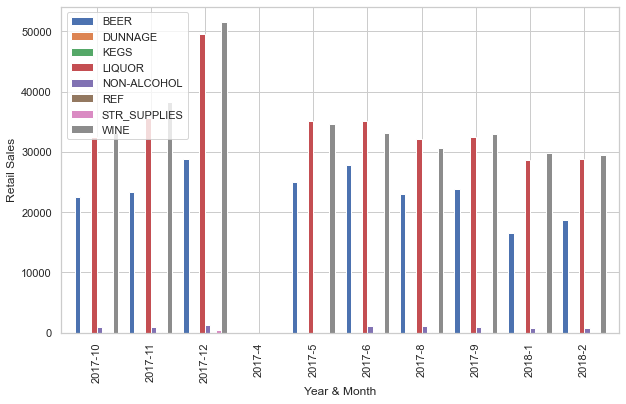

In [65]:
data['Year_Month'] = data.apply(lambda row: str(row['Year']) + '-' + str(row['Month']), axis=1)

sales_by_type = data.groupby(['Year_Month', 'ItemType'])['RetailSales'].sum().reset_index()

sales_by_type = sales_by_type.pivot(index='Year_Month', columns='ItemType', values='RetailSales')

sales_by_type.plot(kind='bar', figsize=(10,6), width=0.8)

plt.xlabel('Year & Month')
plt.ylabel('Retail Sales')
plt.legend(loc='upper left')

plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

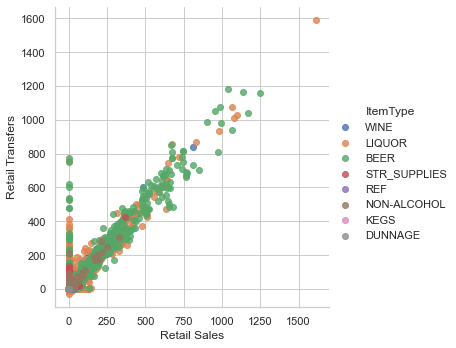

In [66]:
import seaborn as sns
sns.lmplot(x='RetailSales', y='RetailTransfers', data=data, hue='ItemType', fit_reg=False)
plt.xlabel('Retail Sales')
plt.ylabel('Retail Transfers')
plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

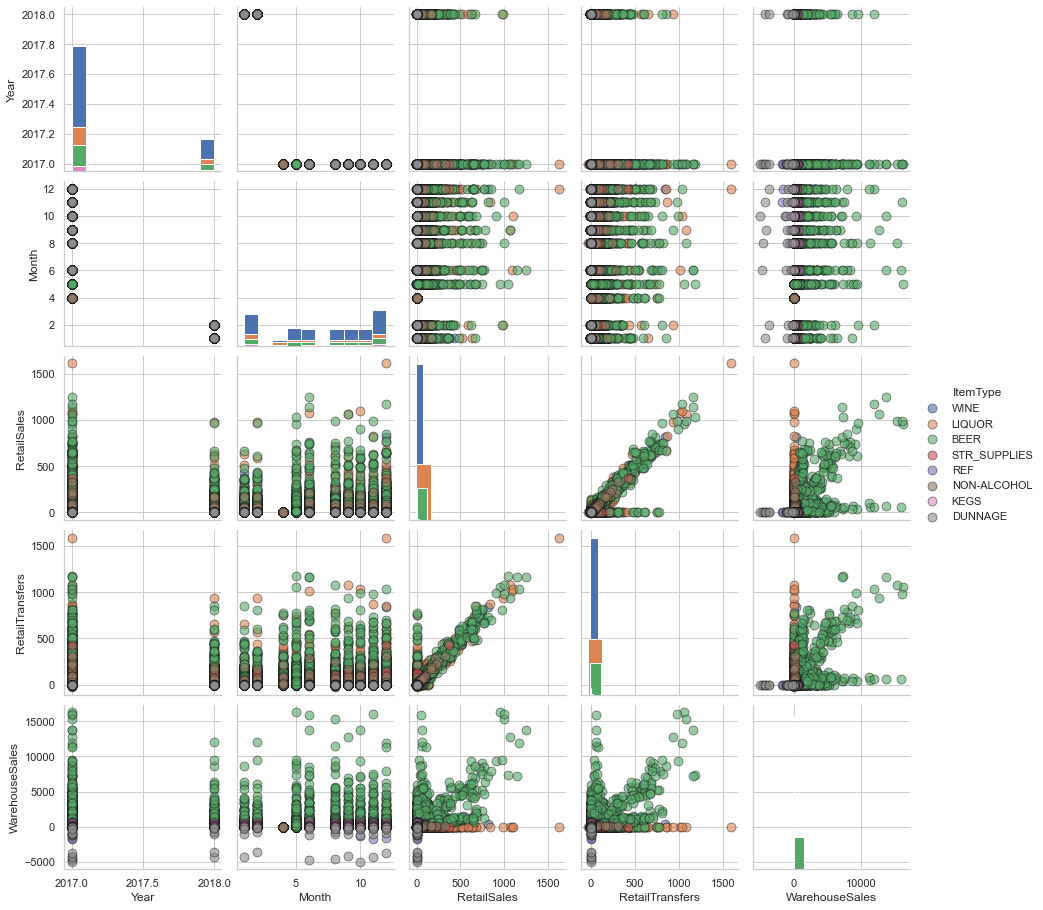

In [69]:

sns.pairplot(data, hue='ItemType', diag_kind='hist', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.show()